In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from IPython.display import clear_output

In [2]:
header = []
header.append("X")
header.append('Y')
header.append('Class')
df = pd.read_csv("1.ushape.csv", names=header)
df

,X,Y,Class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


In [3]:
uniqueClass = df["Class"].unique() 
uniqueClass

array([0., 1.])

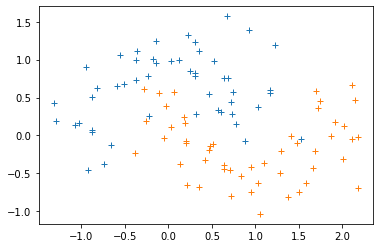

In [4]:
for i in range(0, len(uniqueClass)):
    df1 = df.loc[df["Class"] == uniqueClass[i]]
    plt.plot(df1["X"].to_numpy(), df1["Y"].to_numpy(), "+")

In [5]:
x, y = round(random.uniform(-2,2), 15), round(random.uniform(-2,2), 15)
x, y

(-0.871043685497334, -1.160349512988233)

In [6]:
df["X"].loc[df["Class"] == uniqueClass[0]].iloc[0]

0.03159499363321345

In [7]:
distance = []
for i in range(0, len(uniqueClass)):
    dist_list = []
    for j in range(0, len(df["X"].loc[df["Class"] == uniqueClass[i]])):
        dist = ((x - df["X"].loc[df["Class"] == uniqueClass[i]].iloc[j]) ** 2 + (y - df["Y"].loc[df["Class"] == uniqueClass[i]].iloc[j]) ** 2) ** 0.5
        dist_list.append(dist)
    distance.append(dist_list)
distance

[[2.329337661234145,
  2.061849260694981,
  2.07824416842928,
  3.1554071355405435,
  2.1694093937921104,
  2.3352156395197237,
  2.6651703700507583,
  2.3060917052237873,
  2.040098039596415,
  2.6597342586122252,
  1.8381251738260977,
  2.4658032889217343,
  1.0526805524582776,
  0.7872790944335788,
  2.0858070446939583,
  2.2722724541213624,
  2.379114733448434,
  2.638342165172062,
  1.2069265424750784,
  1.3121275761243087,
  2.442741131042249,
  3.119006725744548,
  3.140226194013741,
  1.954821332686682,
  1.3311445724472277,
  2.105913075583747,
  2.262881022985199,
  1.8734809920683215,
  1.8749197448464383,
  2.5596855335674573,
  1.5541275499984633,
  2.713043061932041,
  2.437045189393543,
  2.210273036707114,
  2.2416951699608467,
  2.372097501371359,
  2.2994113173850037,
  2.0654775426081993,
  1.232891410435861,
  2.5813195666820596,
  2.5149613030862676,
  2.236697600267625,
  1.6657894225807133,
  0.7063769551980118,
  2.1572454457008203,
  1.7924388624518117,
  2.272

In [8]:
class_dist = []
for j in range(0, len(distance)):
    # for k in range(0, len(distance[j])):
    min_ind = distance[j].index(min(distance[j]))
    min_val = distance[j][distance[j].index(min(distance[j]))]
    class_dist.append(min_val)
class_dist

k = 3
i = 0
class_score = [0]*len(class_dist)
while i < k:
    min_ind = class_dist.index(min(class_dist))
    class_score[min_ind] += 1
    distance[min_ind].pop(distance[min_ind].index(min(distance[min_ind])))
    class_dist[min_ind] = distance[min_ind][distance[min_ind].index(min(distance[min_ind]))]
    i += 1
df.loc[len(df.index)] = [x, y, class_score.index(max(class_score))]
print(class_score[0], class_score[1], len(df.loc[(df['Class'] == 0.0)]), len(df.loc[(df['Class'] == 1.0)]))

2 1 51 50


In [9]:
df

,X,Y,Class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0
99,-1.296818,0.184147,0.0


In [ ]:
plt.close()
for i in range(0, len(uniqueClass)):
    df1 = df.loc[df["Class"] == uniqueClass[i]]
    plt.plot(df1["X"].to_numpy(), df1["Y"].to_numpy(), "+")

In [10]:
"""
# print(distance0.index(min(distance0)), distance0[distance0.index(min(distance0))])
# print(distance1.index(min(distance1)), distance1[distance1.index(min(distance1))])
min_ind0 = distance0.index(min(distance0))
min_ind1 = distance1.index(min(distance1))
min0 = distance0[distance0.index(min(distance0))]
min1 = distance1[distance1.index(min(distance1))]
print(min_ind0, min0)
print(min_ind1, min1)

k = 3
i = 0
class0 = 0
class1 = 0
while i < k:
    if min0 <= min1:
        distance0.pop(min_ind0)
        min_ind0 = distance0.index(min(distance0))
        min0 = distance0[distance0.index(min(distance0))]
        class0 += 1
    else:
        distance1.pop(min_ind1)
        min_ind1 = distance1.index(min(distance1))
        min1 = distance1[distance1.index(min(distance1))]
        class1 += 1
    i += 1
if class0 > class1:
    df.loc[len(df.index)] = [x, y, 0.0]
else:
    df.loc[len(df.index)] = [x, y, 1.0]
print(class0, class1, len(df.loc[(df['Class'] == 0.0)]), len(df.loc[(df['Class'] == 1.0)]))
"""

"\n# print(distance0.index(min(distance0)), distance0[distance0.index(min(distance0))])\n# print(distance1.index(min(distance1)), distance1[distance1.index(min(distance1))])\nmin_ind0 = distance0.index(min(distance0))\nmin_ind1 = distance1.index(min(distance1))\nmin0 = distance0[distance0.index(min(distance0))]\nmin1 = distance1[distance1.index(min(distance1))]\nprint(min_ind0, min0)\nprint(min_ind1, min1)\n\nk = 3\ni = 0\nclass0 = 0\nclass1 = 0\nwhile i < k:\n    if min0 <= min1:\n        distance0.pop(min_ind0)\n        min_ind0 = distance0.index(min(distance0))\n        min0 = distance0[distance0.index(min(distance0))]\n        class0 += 1\n    else:\n        distance1.pop(min_ind1)\n        min_ind1 = distance1.index(min(distance1))\n        min1 = distance1[distance1.index(min(distance1))]\n        class1 += 1\n    i += 1\nif class0 > class1:\n    df.loc[len(df.index)] = [x, y, 0.0]\nelse:\n    df.loc[len(df.index)] = [x, y, 1.0]\nprint(class0, class1, len(df.loc[(df['Class'] == 0

In [11]:
len(df.Class.unique())

2

In [12]:
df

,X,Y,Class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0
99,-1.296818,0.184147,0.0
